In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pandas.plotting
import seaborn as sns
import statsmodels.api as sm

In [2]:
health = pd.read_excel('C:\\Sachin new\\Simplilearn\\Course 3 - Machine Learning\\Project - Healthcare\\1645792390_cep1_dataset.xlsx')

### 1. Preliminary Analysis

### Step 1(a) Structure of data and finding missing values

In [3]:
health.shape

(303, 14)

In [4]:
health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
health.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
health.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [7]:
health.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### 1(b) Remove duplicates

In [8]:
health[health.duplicated(keep = False)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [9]:
health.drop_duplicates(inplace=True)

In [ ]:
# There was one duplicate item which was removed from the database.

In [10]:
health.shape

(302, 14)

### Step 2(a) Statistical summary and spread of data

In [11]:
health.describe().T

,count,mean,std,min,25%,50%,75%,max
age,302.0,54.420530,9.047970,29.0,48.00,55.5,61.00,77.0
sex,302.0,0.682119,0.466426,0.0,0.00,1.0,1.00,1.0
cp,302.0,0.963576,1.032044,0.0,0.00,1.0,2.00,3.0
trestbps,302.0,131.602649,17.563394,94.0,120.00,130.0,140.00,200.0
chol,302.0,246.500000,51.753489,126.0,211.00,240.5,274.75,564.0
fbs,302.0,0.149007,0.356686,0.0,0.00,0.0,0.00,1.0
restecg,302.0,0.526490,0.526027,0.0,0.00,1.0,1.00,2.0
thalach,302.0,149.569536,22.903527,71.0,133.25,152.5,166.00,202.0
exang,302.0,0.327815,0.470196,0.0,0.00,0.0,1.00,1.0
oldpeak,302.0,1.043046,1.161452,0.0,0.00,0.8,1.60,6.2


In [12]:
health.mode()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,58.0,1.0,0.0,120.0,197,0.0,1.0,162.0,0.0,0.0,2.0,0.0,2.0,1.0
1,NaN,NaN,NaN,NaN,204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
health.var()

age           81.865757
sex            0.217553
cp             1.065114
trestbps     308.472817
chol        2678.423588
fbs            0.127225
restecg        0.276705
thalach      524.571561
exang          0.221084
oldpeak        1.348971
slope          0.379794
ca             1.013542
thal           0.375800
target         0.248971
dtype: float64

In [14]:
health.kurtosis()

age        -0.527512
sex        -1.391273
cp         -1.183729
trestbps    0.922996
chol        4.542591
fbs         1.937947
restecg    -1.359464
thalach    -0.062186
exang      -1.466170
oldpeak     1.567876
slope      -0.629935
ca          0.781003
thal        0.295855
target     -1.983008
dtype: float64

<AxesSubplot:>

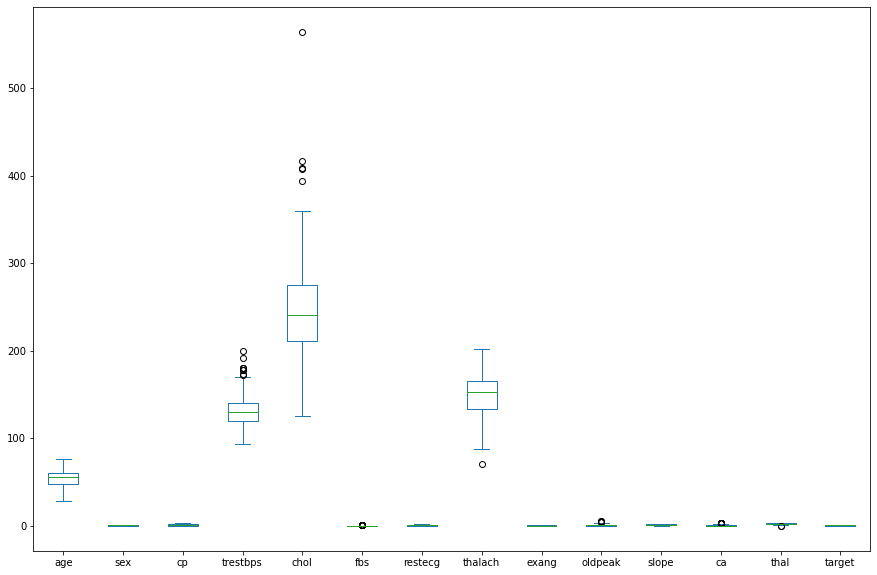

In [15]:
health.plot(kind = 'box', figsize=(15,10))

### 2(b) Describe categorical variables

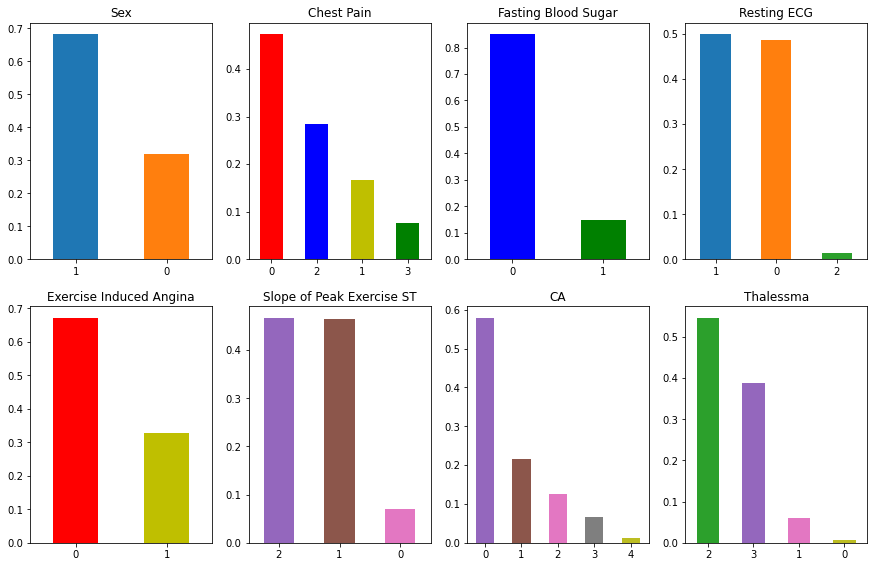

In [16]:
fig = plt.figure(figsize = (15,20))
ax1 = fig.add_subplot(441); ax1.title.set_text('Sex');  
health.sex.value_counts(normalize=True).plot(kind='bar', color = ['C0','C1']); plt.xticks(rotation=0);
ax2 = fig.add_subplot(442); ax2.title.set_text('Chest Pain'); 
health.cp.value_counts(normalize=True).plot(kind='bar', color = ['r','b','y','g']); plt.xticks(rotation=0)
ax3 = fig.add_subplot(443); ax3.title.set_text('Fasting Blood Sugar');  
health.fbs.value_counts(normalize=True).plot(kind='bar', color = ['b','g']); plt.xticks(rotation=0)
ax4 = fig.add_subplot(444); ax4.title.set_text('Resting ECG'); 
health.restecg.value_counts(normalize=True).plot(kind='bar', color = ['C0','C1','C2']); plt.xticks(rotation=0)
ax5 = fig.add_subplot(445); ax5.title.set_text('Exercise Induced Angina'); 
health.exang.value_counts(normalize=True).plot(kind='bar', color = ['r','y']); plt.xticks(rotation=0)
ax6 = fig.add_subplot(446); ax6.title.set_text('Slope of Peak Exercise ST'); 
health.slope.value_counts(normalize=True).plot(kind='bar', color = ['C4','C5','C6']); plt.xticks(rotation=0)
ax7 = fig.add_subplot(447); ax7.title.set_text('CA'); 
health.ca.value_counts(normalize=True).plot(kind='bar', color = ['C4','C5','C6','C7','C8']); plt.xticks(rotation=0)
ax8 = fig.add_subplot(448); ax8.title.set_text('Thalessma'); 
health.thal.value_counts(normalize=True).plot(kind='bar', color = ['C2','C4','C6','C8']); plt.xticks(rotation=0)

plt.show()

### 2(c) Occurrence of CVD across the Age category

In [17]:
bins = [0,40,60,80]
labels = ['0-40','40-60','60-80']
health['AgeCategory']=pd.cut(health['age'],bins = bins, labels = labels, right = False)

In [18]:
health.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,AgeCategory
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,60-80
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0-40
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,40-60
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,40-60
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,40-60


In [19]:
health.groupby(['AgeCategory','target']).count()['age'].to_frame()

age
AgeCategory target     
0-40        0         4
            1        11
40-60       0        82
            1       115
60-80       0        52
            1        38

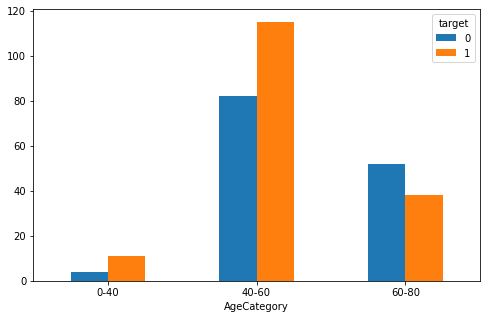

In [20]:
label_agecat = np.array([0,1,2])
label_agecat2 = ['0-40', '40-60','60-80']

ax = pd.crosstab(health.AgeCategory, health.target).plot(kind='bar', figsize=(8, 5));
plt.xticks(label_agecat, label_agecat2, rotation=0);

In [ ]:
# The age category 40-60 was more prone to CVD as compared to other age groups.

### 2(d) Composition of all patients with respect to Sex category

In [21]:
health.groupby(['sex','target']).count()['age'].to_frame()

age
sex target     
0   0        24
    1        72
1   0       114
    1        92

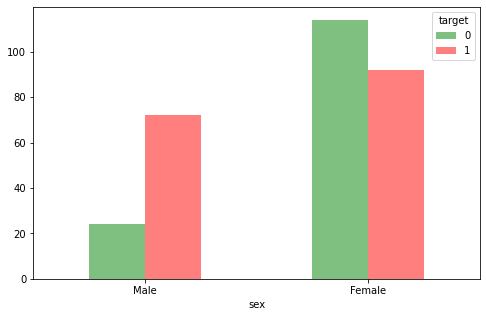

In [22]:
label_sexcat = np.array([0,1])
label_sexcat2 = ['Male', 'Female']

ax = pd.crosstab(health.sex, health.target).plot(kind='bar', figsize=(8, 5), color = ('g','r'), alpha = 0.5);
plt.xticks(label_sexcat, label_sexcat2, rotation=0);

In [ ]:
# Females were more prone to CVD as compared to Males.

### 2(e)	Detect heart attacks based on anomalies in the resting blood pressure of a patient

In [23]:
Q1, Q3 = health['trestbps'].quantile([0.25,0.75])
IQR = Q3-Q1
lower_range = Q1 - (1.5 * IQR)
upper_range = Q3 + (1.5 * IQR)

trestbps_out = health[(health['trestbps'] < lower_range) | (health['trestbps']> upper_range)]

In [24]:
trestbps_out[['trestbps','target']]

,trestbps,target
8,172,1
101,178,1
110,180,1
203,180,0
223,200,0
241,174,0
248,192,0
260,178,0
266,180,0


In [25]:
# since amongst the outliers i.e. anomalies in resting blood pressure, at similar trestbps, 
# there are both cases of people having CVD and people not having CVD.
# Hence, it is inconclusive to detect heart attacks only based on anomalies in resting blood pressure.

### 2(f) Relationship between cholesterol levels and a target variable

In [26]:
bins = [125,200,240,300,375,600]
labels = ['125-200','200-240','240-300','300-375','375-600']
health['CholCategory']=pd.cut(health['chol'],bins = bins, labels = labels, right = False)

In [27]:
health.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,AgeCategory,CholCategory
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,60-80,200-240
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0-40,240-300
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,40-60,200-240
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,40-60,200-240
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,40-60,300-375


In [28]:
health.groupby(['CholCategory','target']).count()['age'].to_frame()

age
CholCategory target     
125-200      0        20
             1        29
200-240      0        39
             1        59
240-300      0        58
             1        53
300-375      0        19
             1        20
375-600      0         2
             1         3

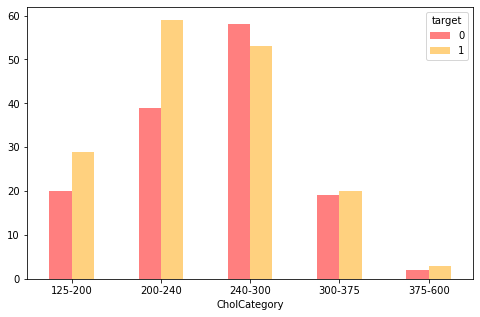

In [29]:
label_cholcat = np.array([0,1,2,3,4])
label_cholcat2 = ['125-200', '200-240','240-300','300-375', '375-600']

ax = pd.crosstab(health.CholCategory, health.target).plot(kind='bar', figsize=(8, 5), color = ('red','orange'), alpha = 0.5);
plt.xticks(label_cholcat, label_cholcat2, rotation=0);

In [30]:
Q1, Q3 = health['chol'].quantile([0.25,0.75])
IQR = Q3-Q1
lower_range = Q1 - (1.5 * IQR)
upper_range = Q3 + (1.5 * IQR)

print(IQR)
print(lower_range)
print(upper_range)
chol_out = health[(health['chol'] < lower_range) | (health['chol']> upper_range)]

63.75
115.375
370.375


In [31]:
chol_out[['chol','target']]

,chol,target
28,417,1
85,564,1
96,394,1
220,407,0
246,409,0


In [ ]:
# People having cholestrol levels between 200 to 300 were more prone to having CVD.
# since amongst the outliers i.e. people having very high cholestrol levels, there are both cases of people having CVD and people not having CVD.
# Hence, it is inconclusive to detect heart attacks only based on very high cholestrol levels.

### 2(g) Relationship between peak exercising and the occurrence of a heart attack

In [32]:
health.target.corr(health.slope).round(2)

0.34

<AxesSubplot:xlabel='slope', ylabel='Density'>

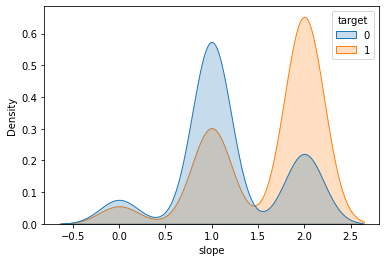

In [33]:
sns.kdeplot(health['slope'],hue=health['target'],shade = True)

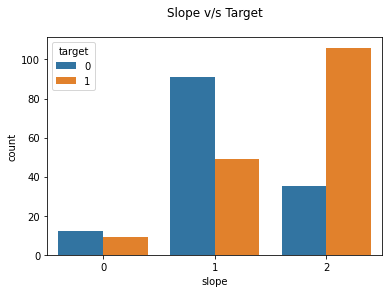

In [34]:
sns.countplot(data= health, x='slope',hue='target')
plt.title('Slope v/s Target\n');

In [ ]:
# People with slope = 2 i.e. peak exercise ST segment were more prone to having CVD.

### 2(h)	Whether Thalassemia is a major cause of CVD

In [35]:
pd.crosstab(health.thal,health.target)

target,0,1
thal,,
0,1,1
1,12,6
2,36,129
3,89,28


<AxesSubplot:xlabel='thal', ylabel='Density'>

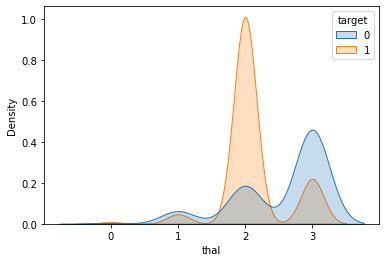

In [36]:
sns.kdeplot(health['thal'],hue=health['target'],shade = True)

<AxesSubplot:xlabel='target', ylabel='count'>

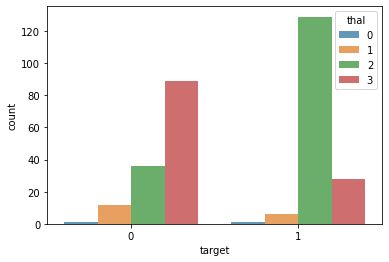

In [37]:
sns.countplot(data= health, x='target',hue='thal', alpha = 0.75)

In [38]:
health.target.corr(health.thal).round(2)

-0.34

In [ ]:
# W.r.t. Thalesima, people with thal = 2 were more prone to having CVD.

### 2(i)	List how the other factors determine the occurrence of CVD

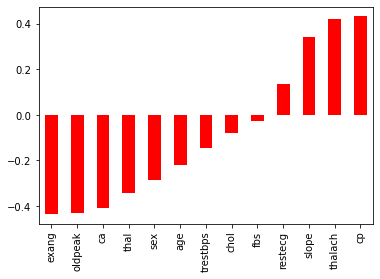

In [39]:
health.corr()['target'].sort_values().drop('target').plot(kind = 'bar', color="red");

### 2 (j) Pair plot

In [40]:
health.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target', 'AgeCategory',
       'CholCategory'],
      dtype='object')

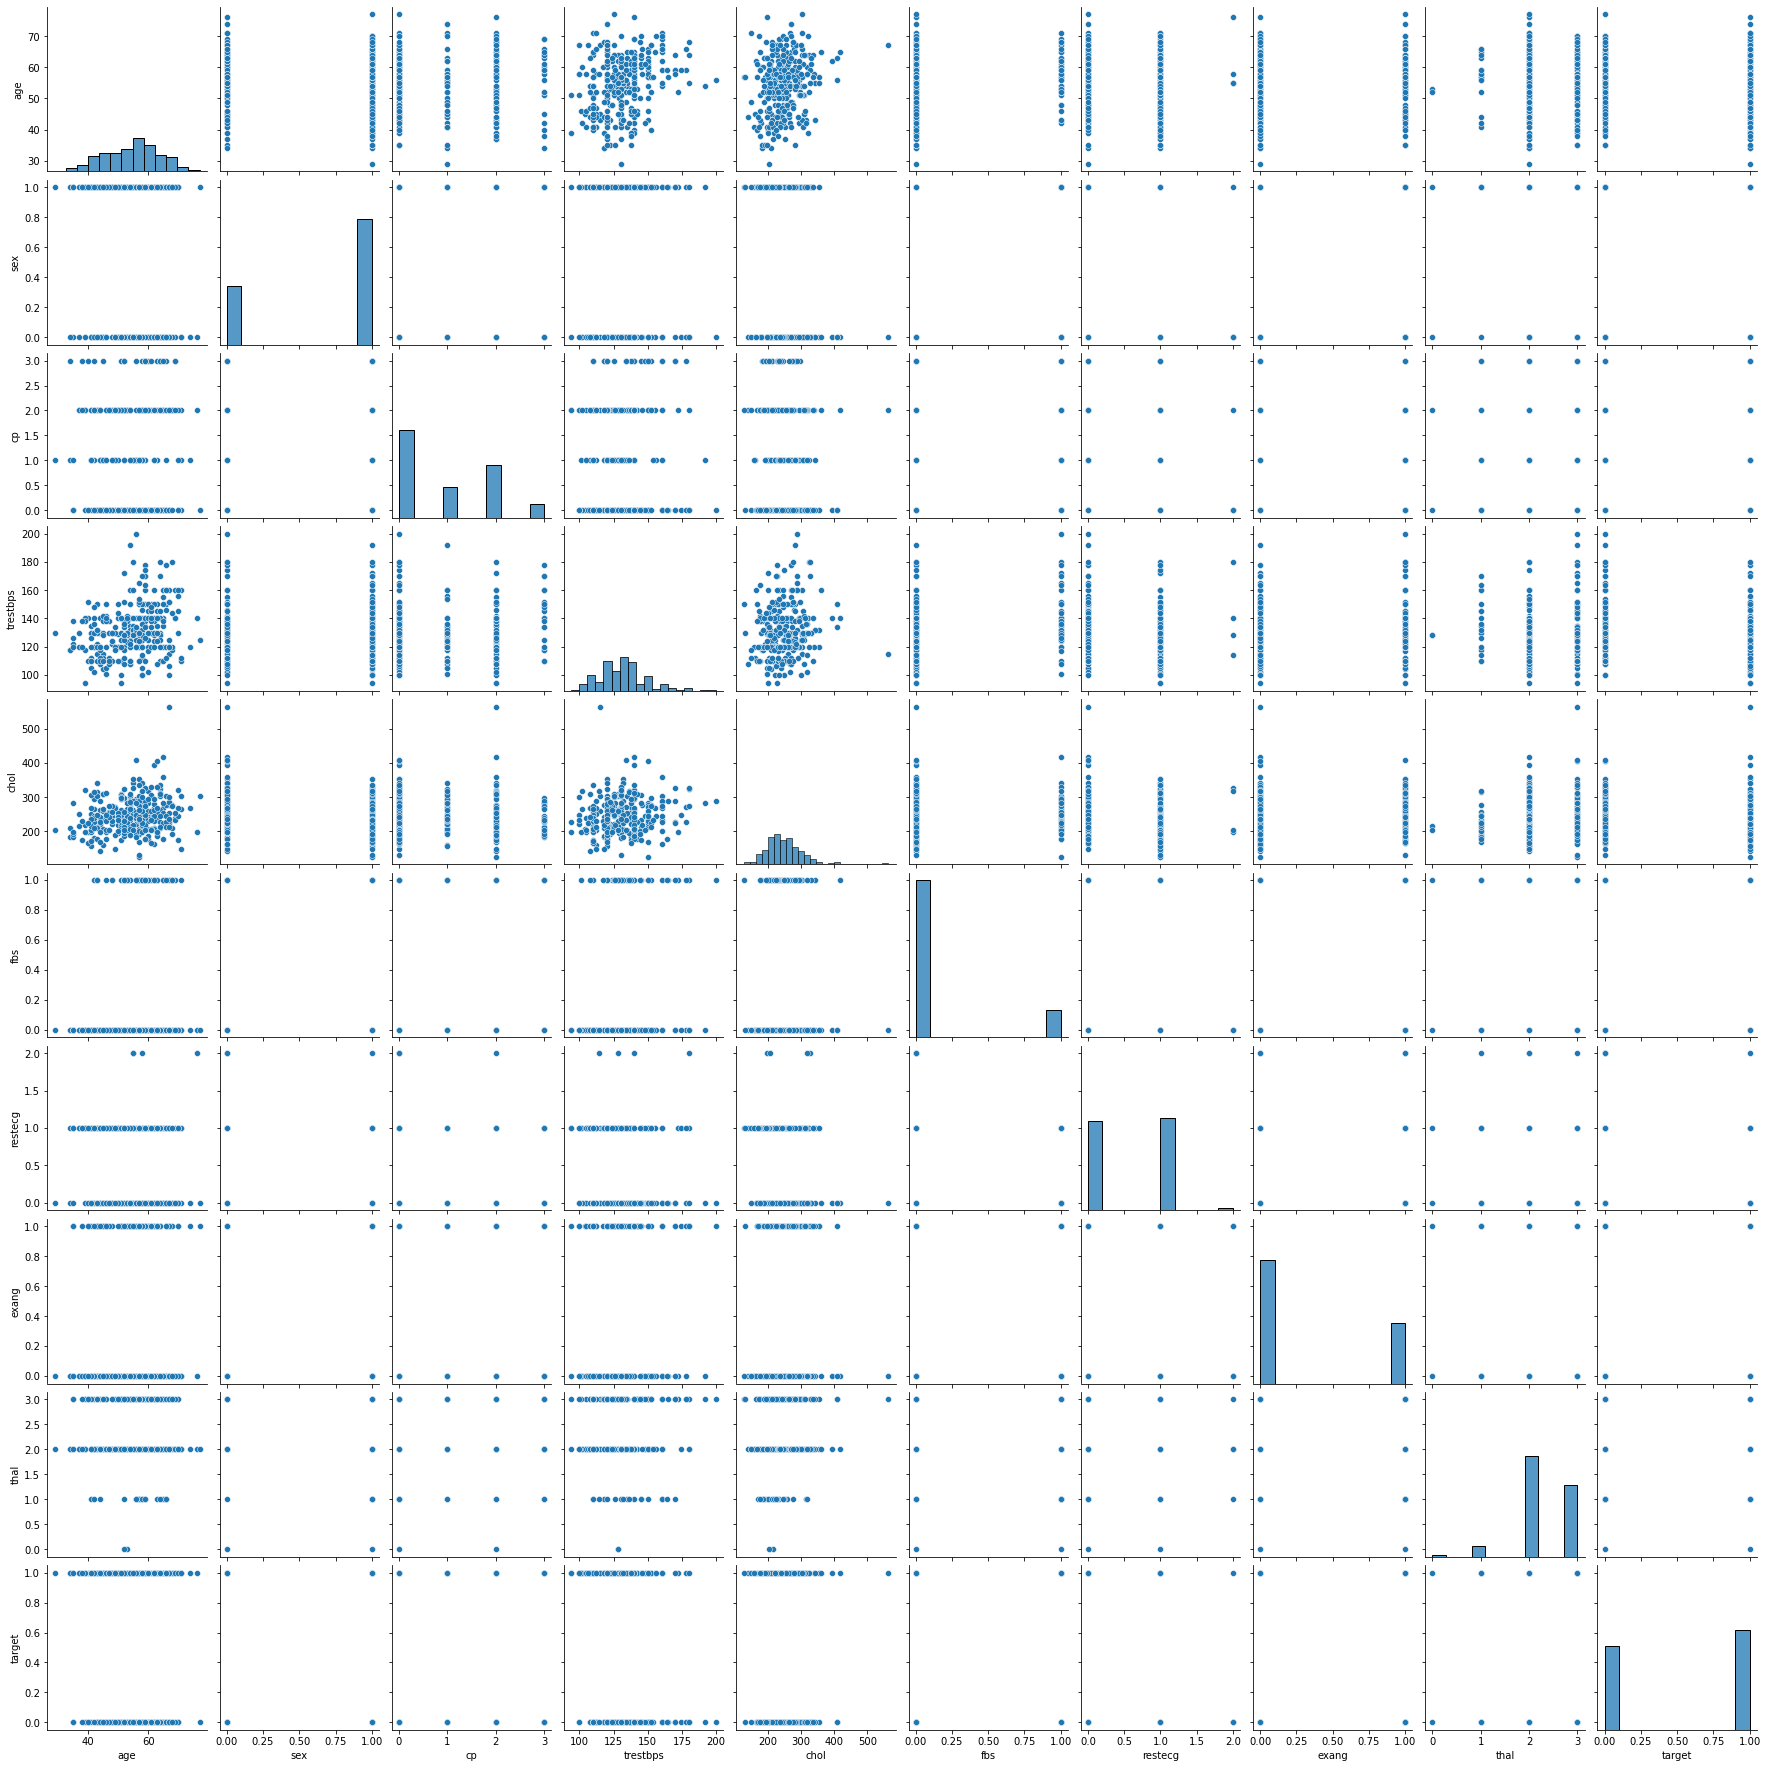

In [41]:
# considering too many variables, have selected important columns for the pairplot.

sns.pairplot(health,vars = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'exang','thal', 'target'])

### 3. Baseline model using Logistic Regression

In [42]:
x = health.drop(['target','AgeCategory','CholCategory'], axis = 1)

In [43]:
y = health['target']

In [44]:
# Splitting the data into training set and test set

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 15)

In [45]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
226,62,1,1,120,281,0,0,103,0,1.4,1,1,3
129,74,0,1,120,269,0,0,121,1,0.2,2,1,2
224,54,1,0,110,239,0,1,126,1,2.8,1,1,3
191,58,1,0,128,216,0,0,131,1,2.2,1,3,3
20,59,1,0,135,234,0,1,161,0,0.5,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,44,1,0,110,197,0,0,177,0,0.0,2,1,2
155,58,0,0,130,197,0,1,131,0,0.6,1,0,2
156,47,1,2,130,253,0,1,179,0,0.0,2,0,2
133,41,1,1,110,235,0,1,153,0,0.0,2,0,2


In [46]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
288,57,1,0,110,335,0,1,143,1,3.0,1,1,3
64,58,1,2,140,211,1,0,165,0,0.0,2,0,2
94,45,0,1,112,160,0,1,138,0,0.0,1,0,2
144,76,0,2,140,197,0,2,116,0,1.1,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50,51,0,2,130,256,0,0,149,0,0.5,2,0,2
97,52,1,0,108,233,1,1,147,0,0.1,2,3,3
168,63,1,0,130,254,0,0,147,0,1.4,1,1,3
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1


In [47]:
y_train

226    0
129    1
224    0
191    0
20     1
      ..
200    0
155    1
156    1
133    1
246    0
Name: target, Length: 241, dtype: int64

In [48]:
y_test

75     1
288    0
64     1
94     1
144    1
      ..
50     1
97     1
168    0
297    0
295    0
Name: target, Length: 61, dtype: int64

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix , classification_report

In [50]:
LR = LogisticRegression(random_state = 10) 

In [51]:
LR.fit(x_train,y_train);

C:\Users\14sac\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [52]:
y_pred = LR.predict(x_test)

In [53]:
y_pred

array([1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0], dtype=int64)

In [54]:
print(confusion_matrix(y_test,y_pred))

[[15 11]
 [ 6 29]]


In [55]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.71      0.58      0.64        26
           1       0.72      0.83      0.77        35

    accuracy                           0.72        61
   macro avg       0.72      0.70      0.71        61
weighted avg       0.72      0.72      0.72        61



In [56]:
pd.DataFrame(data = {'Columns' : x_train.columns , 'Betas' : LR.coef_.flatten()}).sort_values('Betas')

,Columns,Betas
12,thal,-1.327547
11,ca,-1.052569
1,sex,-1.048218
8,exang,-0.822397
9,oldpeak,-0.475267
5,fbs,-0.198236
3,trestbps,-0.009206
4,chol,0.001174
0,age,0.013713
7,thalach,0.024626


### 3(b) Baseline model using Random Forest

In [57]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
rf = RandomForestClassifier(n_estimators=50, random_state = 50) 

In [59]:
rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=50)

In [60]:
y_pred1 = rf.predict(x_test)

In [61]:
y_pred1

array([1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0], dtype=int64)

In [62]:
print(confusion_matrix(y_test,y_pred1))

[[20  6]
 [ 5 30]]


In [63]:
print(classification_report(y_test , y_pred1))

              precision    recall  f1-score   support

           0       0.80      0.77      0.78        26
           1       0.83      0.86      0.85        35

    accuracy                           0.82        61
   macro avg       0.82      0.81      0.81        61
weighted avg       0.82      0.82      0.82        61



In [ ]:
# Accuracy score of 82% using the Random Forest model was providing the best prediction as compared to Logistic Regression.

In [64]:
pd.DataFrame(rf.feature_importances_ , index = x_train.columns).sort_values(0 , ascending = False)

,0
ca,0.150653
thal,0.133014
cp,0.123803
thalach,0.114281
oldpeak,0.103517
chol,0.077661
age,0.076907
trestbps,0.063742
slope,0.055882
exang,0.044801


### Using GridSearchCV to fine tune the parameters

In [65]:
from sklearn.model_selection import GridSearchCV

In [66]:
param_grid = {'n_estimators': [20,30,50,100,150,200,250],
              'criterion': ['gini' , 'entropy'],
              'max_depth' : [3, 5, 10,20],
              'min_samples_split' : [5 , 10, 20,30,50]
             } 

In [67]:
grid = GridSearchCV( rf, param_grid , refit = True , verbose = 1, n_jobs = -1 , cv = 2)

grid.fit(x_train,y_train)

Fitting 2 folds for each of 280 candidates, totalling 560 fits


GridSearchCV(cv=2,
             estimator=RandomForestClassifier(n_estimators=50, random_state=50),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, 20],
                         'min_samples_split': [5, 10, 20, 30, 50],
                         'n_estimators': [20, 30, 50, 100, 150, 200, 250]},
             verbose=1)

In [68]:
grid_predictions = grid.predict(x_test)

In [69]:
print(confusion_matrix(y_test,grid_predictions))

[[18  8]
 [ 7 28]]


In [70]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.72      0.69      0.71        26
           1       0.78      0.80      0.79        35

    accuracy                           0.75        61
   macro avg       0.75      0.75      0.75        61
weighted avg       0.75      0.75      0.75        61



In [71]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_split': 30,
 'n_estimators': 100}

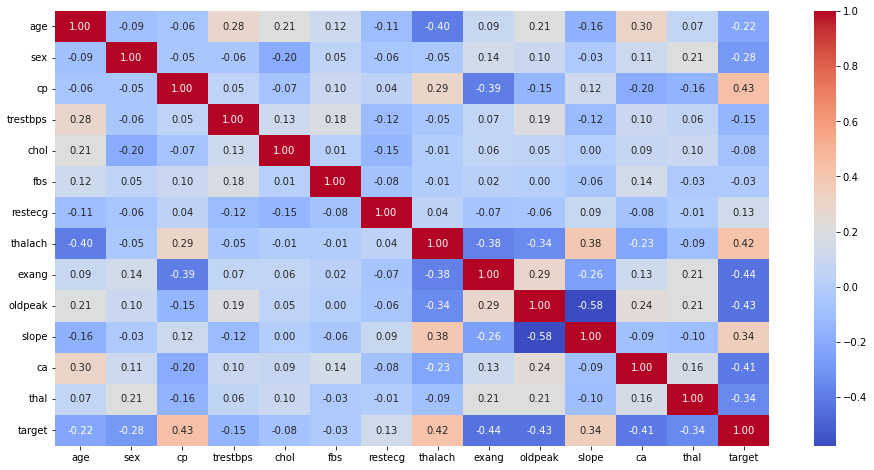

In [72]:
plt.figure(figsize= (16, 8))
sns.heatmap(health.corr(), annot = True, cmap= 'coolwarm', fmt= '.2f');

### Logistic regression values using Stats Model

In [73]:
lr_sm = sm.Logit(y_train, x_train).fit()

Optimization terminated successfully.
         Current function value: 0.317146
         Iterations 7


In [74]:
print(lr_sm.summary())

                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  241
Model:                          Logit   Df Residuals:                      228
Method:                           MLE   Df Model:                           12
Date:                Sun, 13 Nov 2022   Pseudo R-squ.:                  0.5408
Time:                        17:34:30   Log-Likelihood:                -76.432
converged:                       True   LL-Null:                       -166.45
Covariance Type:            nonrobust   LLR p-value:                 4.201e-32
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.0193      0.023      0.844      0.399      -0.025       0.064
sex           -1.2902      0.505     -2.557      0.011      -2.279      -0.301
cp             0.9667      0.236      4.105      0.0

In [75]:
y_pred2=lr_sm.predict(x_test)

In [76]:
prediction = list(map(round, y_pred2))

In [77]:
print('Actual values: ', list(y_test.values))
print('Predictions :', prediction)

Actual values:  [1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0]
Predictions : [1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0]


In [78]:
print(confusion_matrix(y_test,prediction))

[[15 11]
 [ 7 28]]


In [79]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.68      0.58      0.62        26
           1       0.72      0.80      0.76        35

    accuracy                           0.70        61
   macro avg       0.70      0.69      0.69        61
weighted avg       0.70      0.70      0.70        61



### Using feature selection by dropping features having p-value <0.05

In [80]:
x1 = health.drop(['age','trestbps','chol','fbs','restecg','slope','target','AgeCategory','CholCategory'],axis=1)

In [81]:
x1_train, x1_test, y_train, y_test = train_test_split(x1, y, test_size = 0.2, random_state = 20)

In [82]:
lr_sm_reduced = sm.Logit(y_train, x1_train).fit()

Optimization terminated successfully.
         Current function value: 0.376149
         Iterations 7


In [83]:
print(lr_sm_reduced.summary())

                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  241
Model:                          Logit   Df Residuals:                      234
Method:                           MLE   Df Model:                            6
Date:                Sun, 13 Nov 2022   Pseudo R-squ.:                  0.4565
Time:                        17:34:53   Log-Likelihood:                -90.652
converged:                       True   LL-Null:                       -166.80
Covariance Type:            nonrobust   LLR p-value:                 2.536e-30
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sex           -1.3464      0.437     -3.082      0.002      -2.203      -0.490
cp             0.6853      0.194      3.540      0.000       0.306       1.065
thalach        0.0260      0.005      5.272      0.0

In [84]:
y_pred3=lr_sm_reduced.predict(x1_test)

In [85]:
prediction1 = list(map(round, y_pred3))

In [86]:
print('Actual values: ', list(y_test.values))
print('Predictions :', prediction1)

Actual values:  [0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0]
Predictions : [0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0]


In [87]:
print(confusion_matrix(y_test,prediction1))

[[19  4]
 [ 7 31]]


In [88]:
print(classification_report(y_test,prediction1))

              precision    recall  f1-score   support

           0       0.73      0.83      0.78        23
           1       0.89      0.82      0.85        38

    accuracy                           0.82        61
   macro avg       0.81      0.82      0.81        61
weighted avg       0.83      0.82      0.82        61



In [ ]:
# Prediction of CVD after using feature engineering in Logistic Regression, using the StatsModel, had an accuracy score of 82%.